Optimization terminated successfully.
         Current function value: 0.319276
         Iterations 8


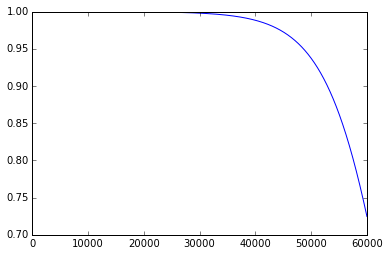

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

def pz(fico,amt,coeff):
    z = coeff[0]*fico + coeff[1]*amt + coeff[2]
    return 1/(1+np.exp(-z))

loan = pd.read_csv('loansData.csv')
loan = loan.dropna(how = 'any')
loan = loan[['Interest.Rate', 'FICO.Range', 'Loan.Length', 'Monthly.Income', 'Amount.Requested']]
f = loan['Interest.Rate']
f = [float(a[:-1]) for a in f]
loan['Interest.Rate'] = f
loan['TF'] = loan['Interest.Rate']<=12
f = loan['FICO.Range']
f = [int(a[:3]) + 2 for a in f]
loan['FICO.Score'] = f
loan['intercept'] = 1.0
ind_cols=['FICO.Score','Amount.Requested','intercept']
logit = sm.Logit(loan['TF'], loan[ind_cols])
result = logit.fit()
coeff = result.params
xlist = range(0, 60000, 10)
ylist = [pz(820, x, coeff) for x in xlist]
pl.plot(xlist, ylist)
pl.show()

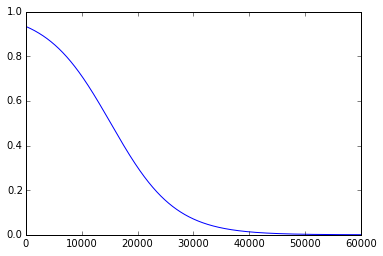

In [13]:
xlist = range(0, 60000, 10)
ylist = [pz(720, x, coeff) for x in xlist]
pl.plot(xlist, ylist)
pl.show()